In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rcParams['figure.dpi'] = 300

sns.set_palette("husl")
sns.set_style("whitegrid")

# Visualizações

## Construtores

### Tratamento do DataFrame

Ignorando valores não-utilizados.

In [3]:
constructors_df_raw = pd.read_csv(".data/constructors.csv")
constructors_df_raw

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [4]:
constructors_df = constructors_df_raw[[
    "constructorId",
    "name",
    "nationality"
]]
constructors_df = constructors_df.set_index("constructorId")
constructors_df

,name,nationality
constructorId,,
1,McLaren,British
2,BMW Sauber,German
3,Williams,British
4,Renault,French
5,Toro Rosso,Italian
...,...,...
209,Manor Marussia,British
210,Haas F1 Team,American
211,Racing Point,British


### Distribuição de nacionalidades

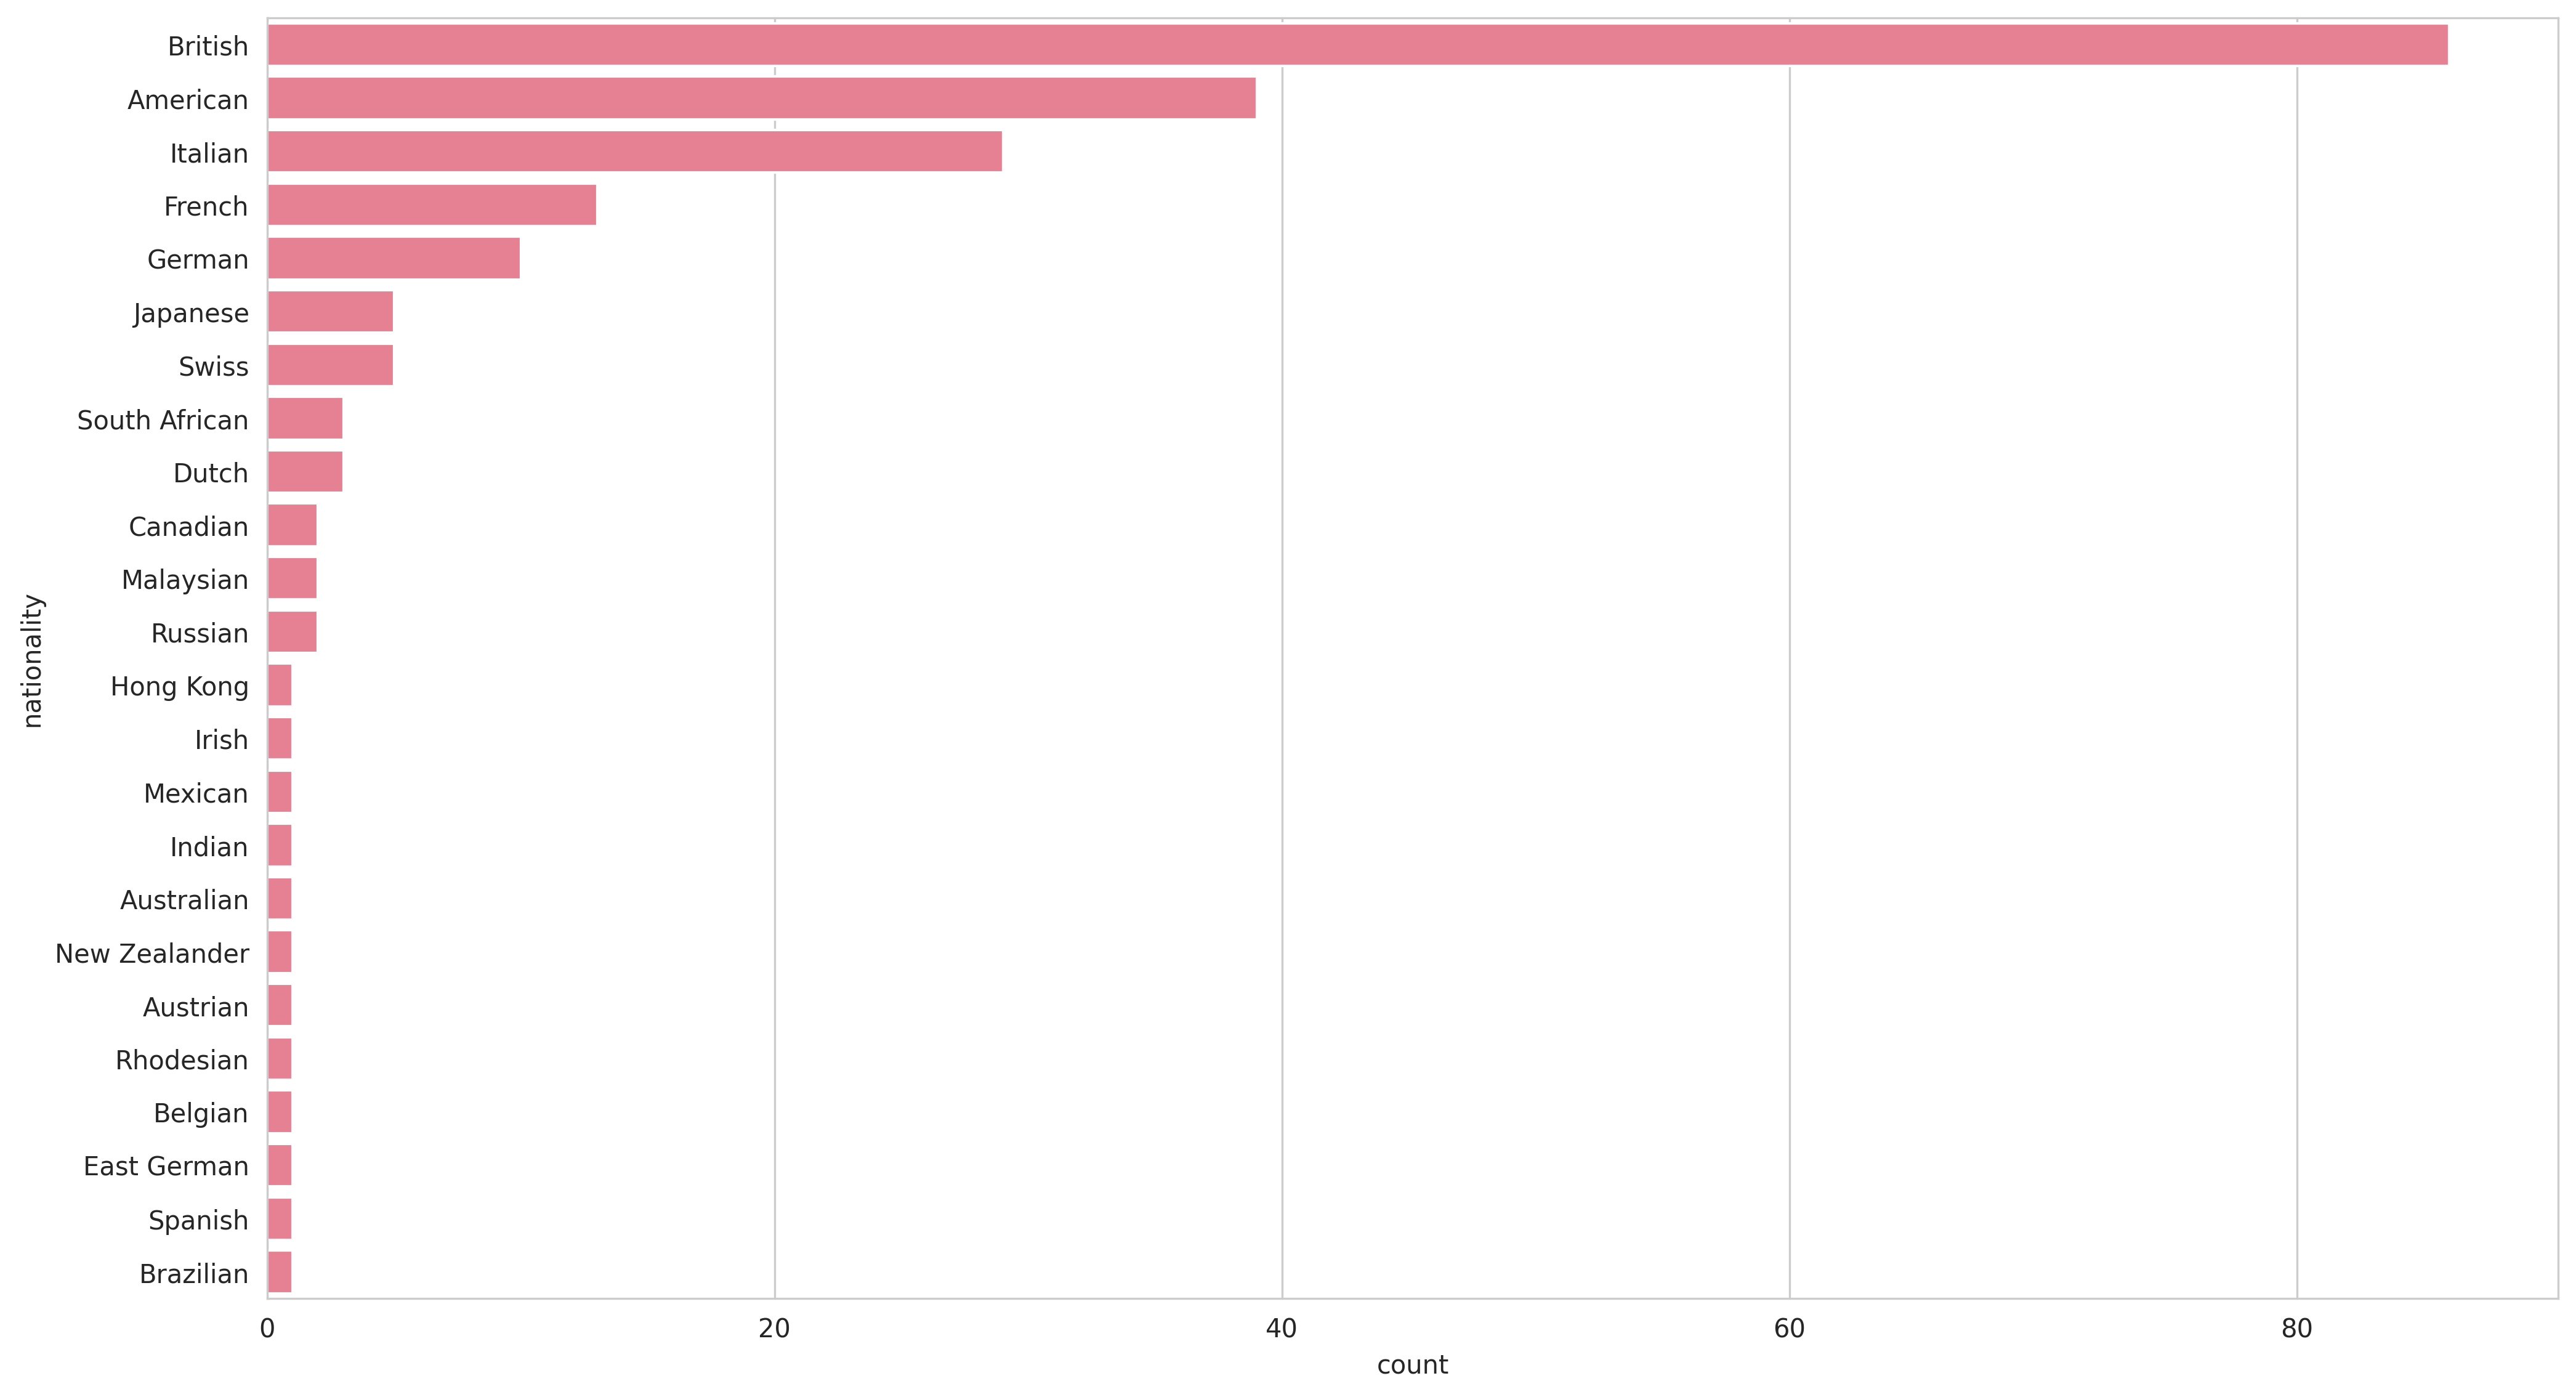

In [5]:
fig, ax = plt.subplots(figsize=(16, 9))
# SNS count plot order by value counts
sns.countplot(constructors_df, y="nationality", order=constructors_df["nationality"].value_counts().index)
plt.show()

Nota-se:

- Há um domínio de equipes britânicas e americanas no esporte em toda sua história.
  - Isso faz sentido levando em conta o poderio econômico desses países, além do fato da Grã-Bretanha ser até hoje o país que mais consume automobilismo.
- Pelas mesmas razões, outros países europeus menores apresentam uma alta quantidade de construtores também.
- Nota-se que há muitos países que contém apenas uma equipe. Há casos como o Brasil, com equipes como a Copersucar, e casos de "equipes fantasma", que são abordadas na seção a seguir.

### [Distribuição de voltas](#constructor_lap_distribution)

### Filtrando construtores "fantasma"

Por questões de curiosidade, ao investigar qual era a equipe da Rodésia do Sul, descobri que se trata de uma construtora que se inscreveu para apenas uma prova na década de 60, mais especificamente, o GP da África do Sul de 1965. Apesar da inscrição ter sido feita, a equipe não chegou nem a participar do Grande Prêmio. (https://www.statsf1.com/en/realpha.aspx)

Para filtrar os construtores apresentados e exigir um pouco mais de consistência dos nossos dados, iremos filtrar todos os construtores que realizaram ao menos 5 voltas em toda sua história. Para isso, precisaremos usar o conjunto de dados de resultados de corridas, filtrando-os por `constructorId`.

In [6]:
result_df_raw = pd.read_csv(".data/results.csv")
result_df_raw

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,1
26076,26082,1110,858,3,2,18,17,17,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,1
26077,26083,1110,807,210,27,0,18,18,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,229.415,1
26078,26084,1110,832,6,55,4,\N,R,19,0.0,23,\N,\N,9,19,1:53.138,222.864,130


In [7]:
if "laps" in constructors_df.columns:
    constructors_df = constructors_df.drop("laps", axis=1)
constructors_df_laps = result_df_raw[[
    "constructorId",
    "laps"
]].groupby("constructorId").sum()
constructors_df = constructors_df.join(constructors_df_laps)
constructors_df = constructors_df.fillna(0).astype({"laps": int})
constructors_df

,name,nationality,laps
constructorId,,,
1,McLaren,British,93858
2,BMW Sauber,German,7938
3,Williams,British,82580
4,Renault,French,38339
5,Toro Rosso,Italian,26973
...,...,...,...
209,Manor Marussia,British,4078
210,Haas F1 Team,American,16155
211,Racing Point,British,4156


<text style="color: red">Nota-se: foi usado agrupamento por `constructorId`, ignorando completamente o fato de que dois (ou mais, a depender da temporada) pilotos podem atuar por uma mesma equipe em determinada corrida. Para nossos propósitos de filtragem, isso é irrelevante.</text>

<a id='constructor_lap_distribution'></a>
Quais equipes com mais voltas-piloto na história da Fórmula 1? Para facilitar visualização, iremos limitar às 15 primeiras.

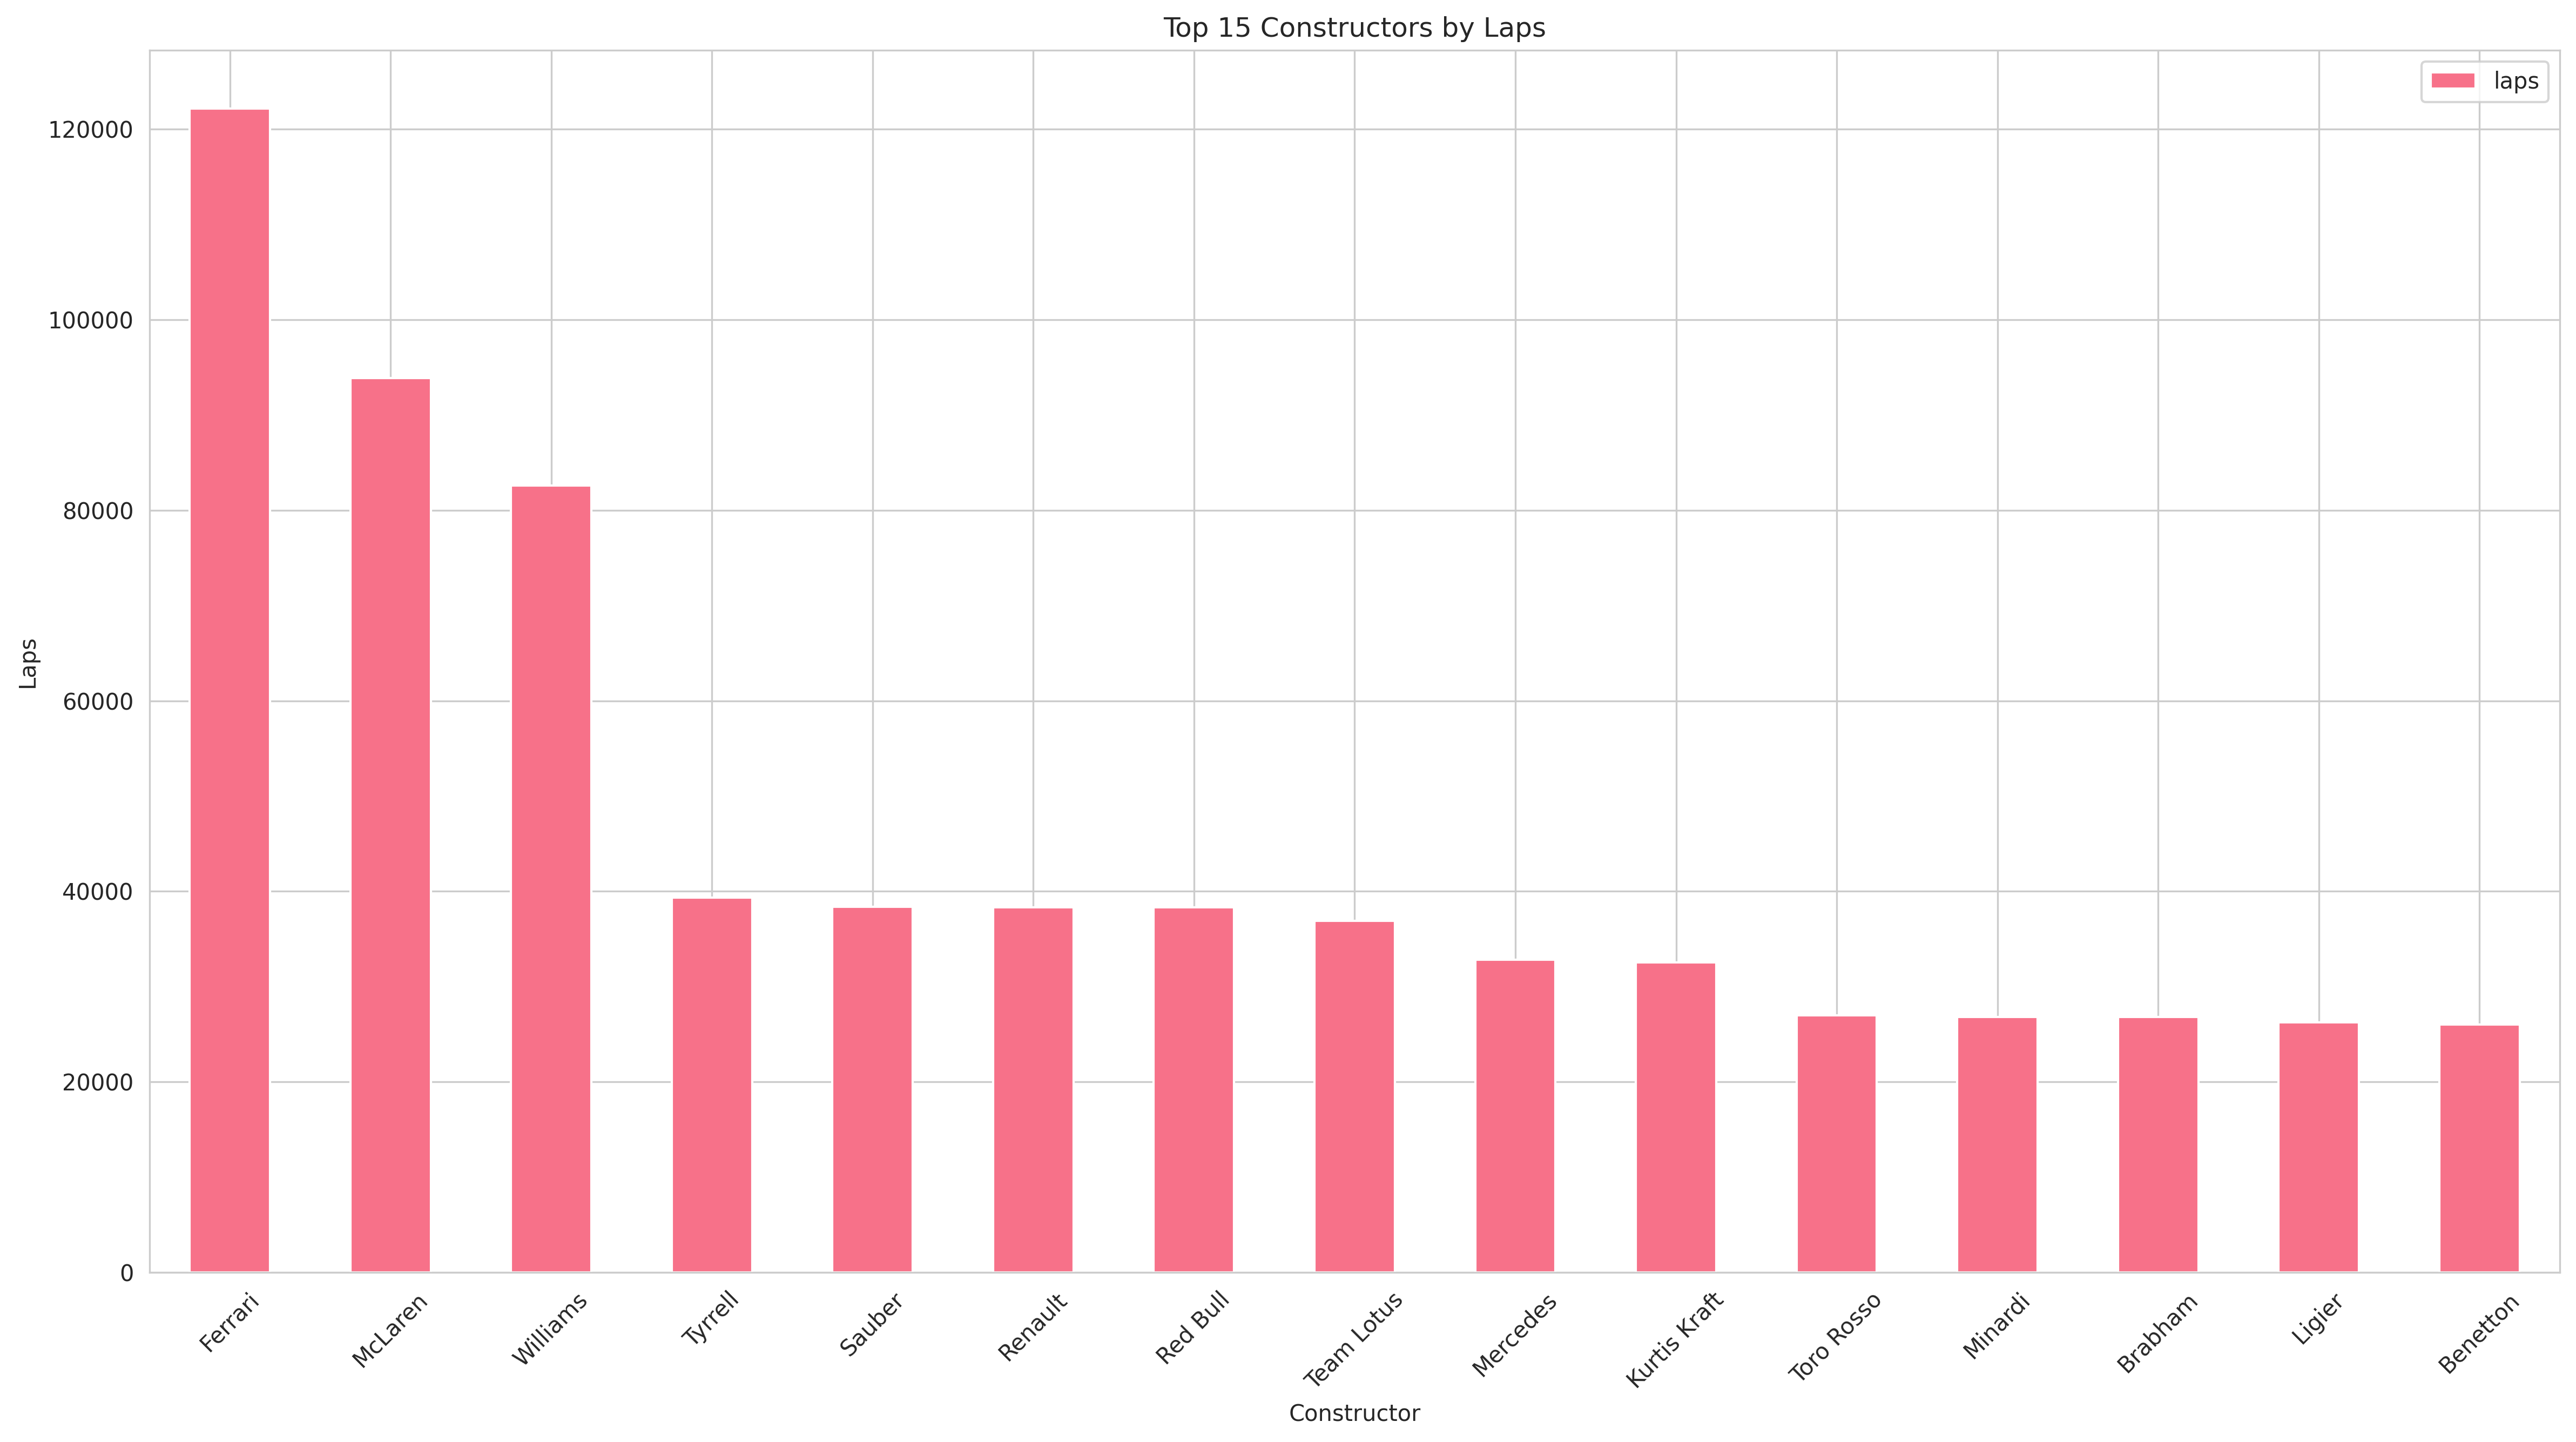

In [8]:
fig, ax = plt.subplots(figsize=(16, 9))

constructors_df.sort_values("laps", ascending=False).head(15).plot(kind="bar", x="name", y="laps", ax=ax)
ax.set_title("Top 15 Constructors by Laps")
ax.set_xlabel("Constructor")
ax.set_ylabel("Laps")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Novamente, esse resultado faz todo sentido levando em conta que a Scuderia Ferrari foi a única equipe a participar de todas as temporadas da Fórmula 1 desde 1950.

Voltando ao tema principal dessa seção, queremos avaliar a distribuição de nacionalidades excluindo as equipes fantasma.

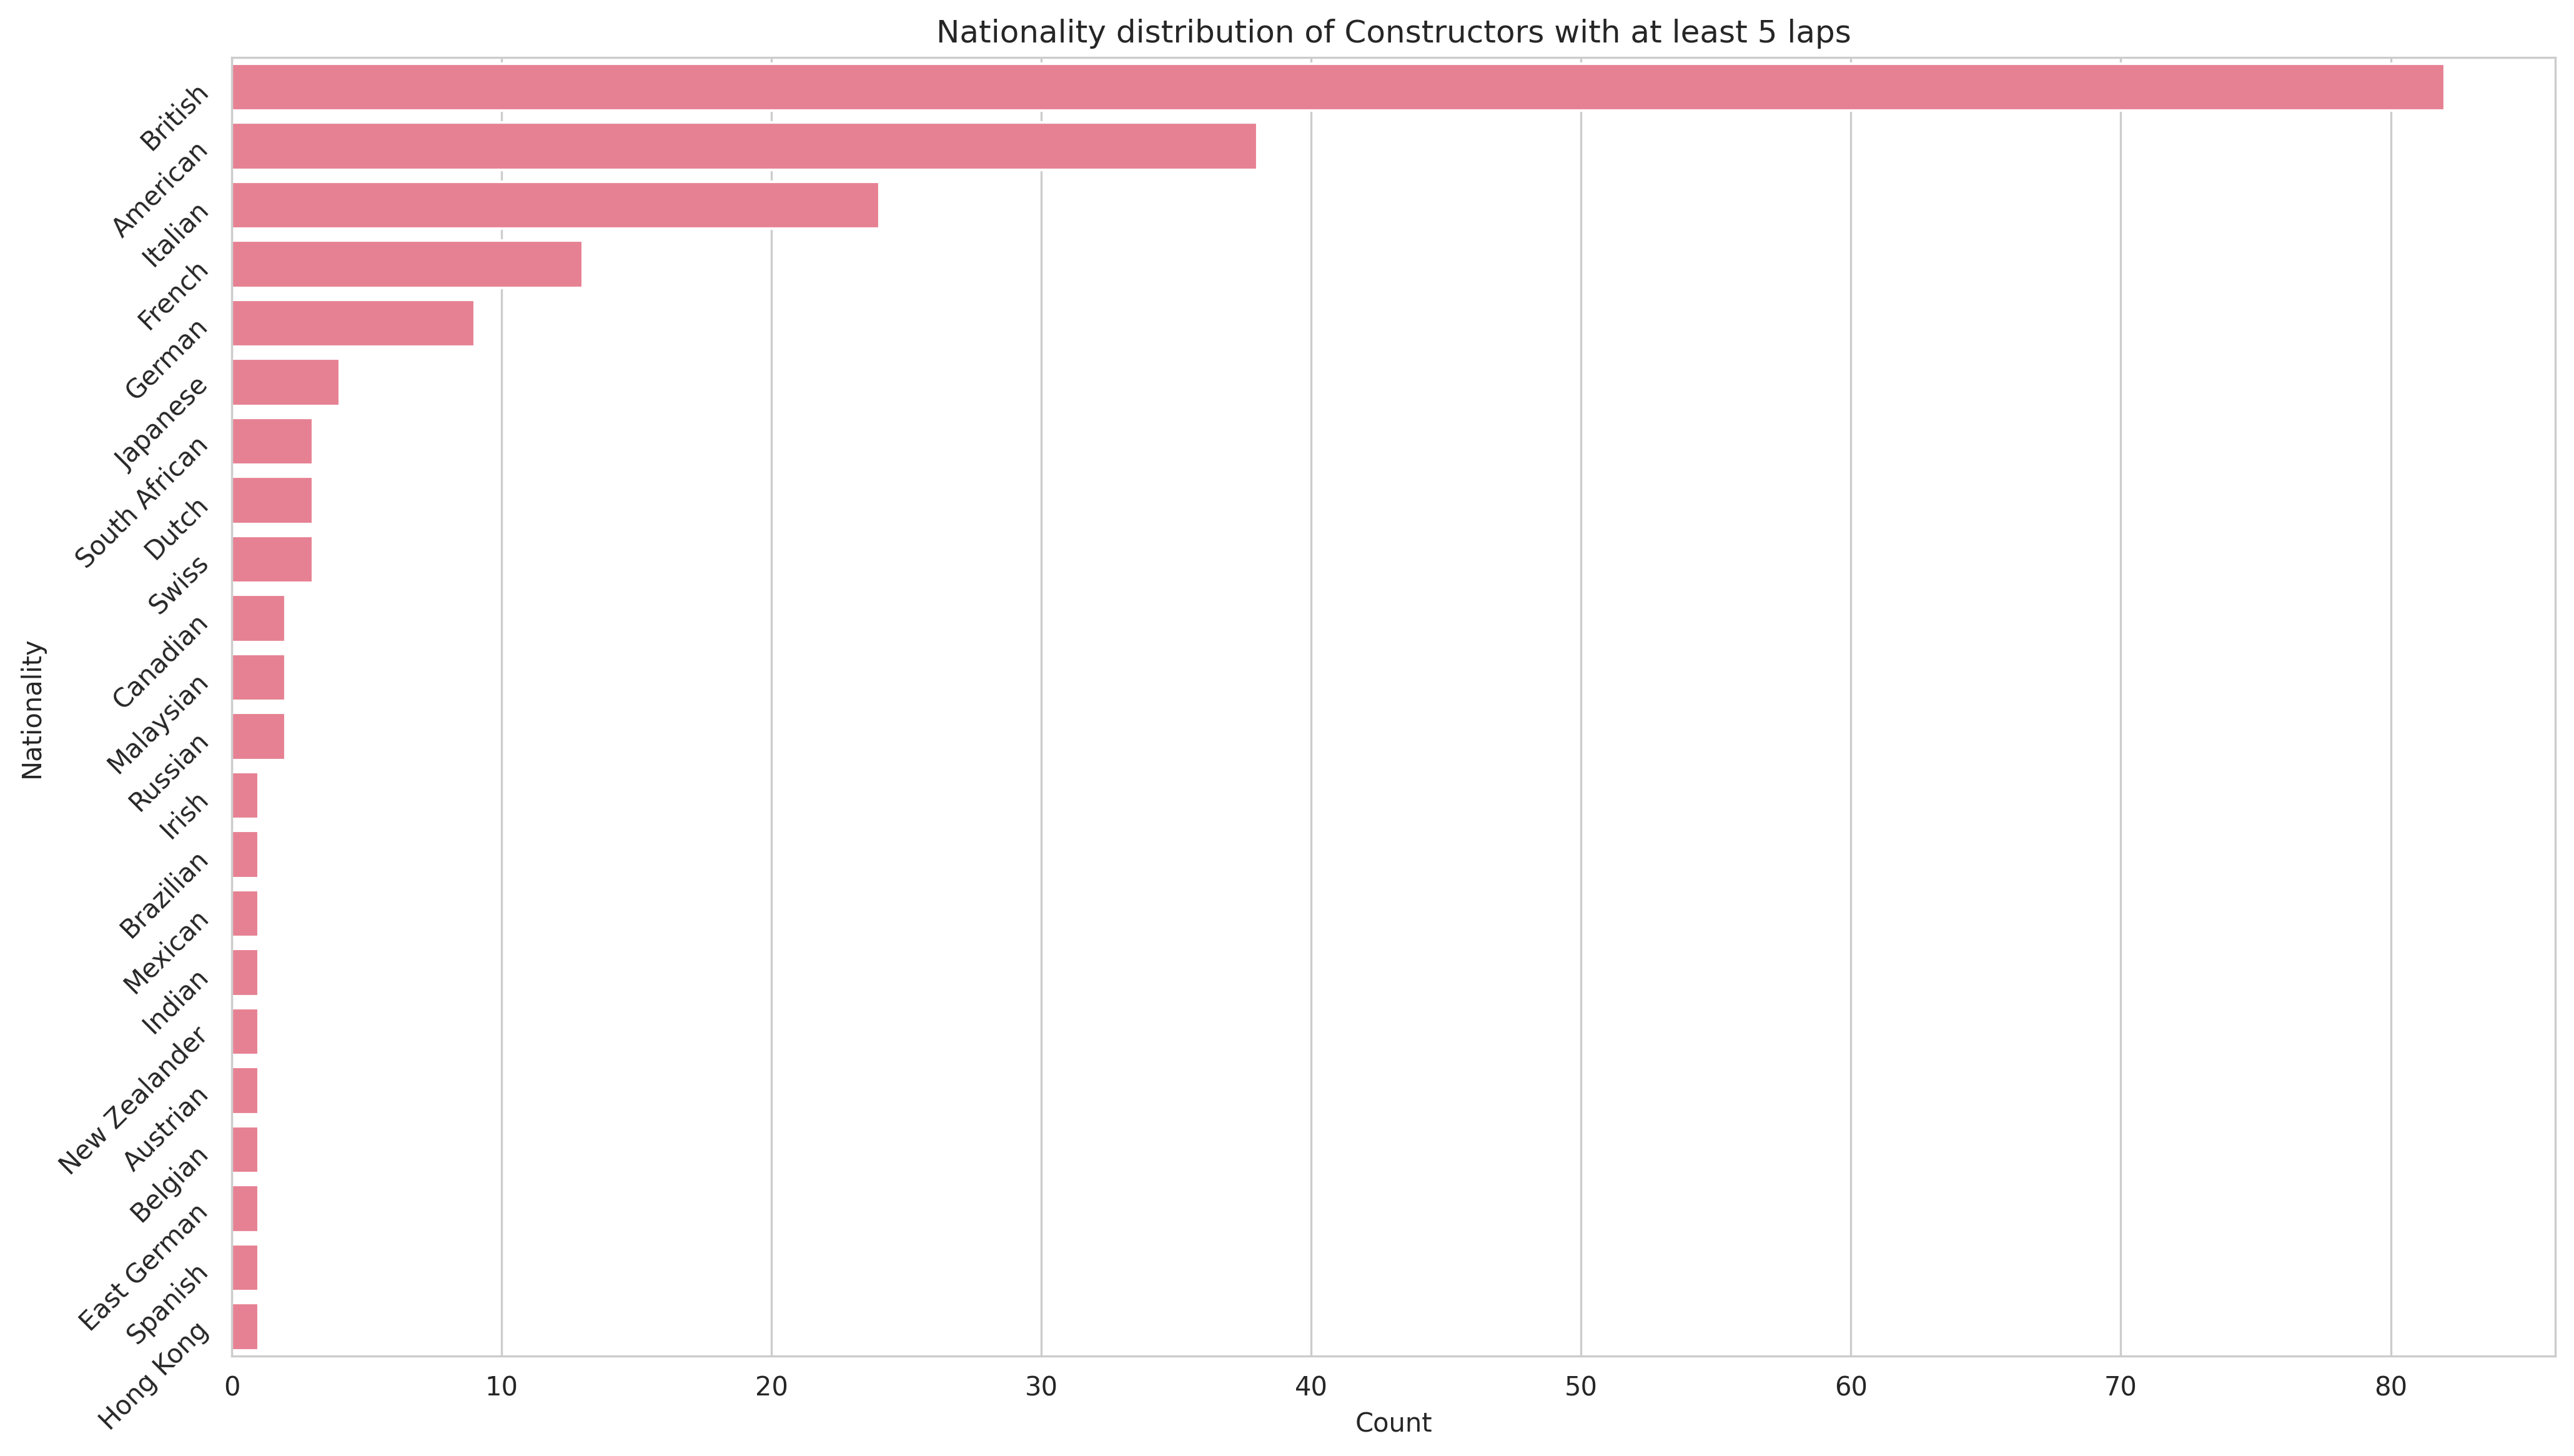

In [9]:
fig, ax = plt.subplots(figsize=(16, 9))
LAPS = 5
filtered_constructors_df = constructors_df.query("laps >= @@LAPS")
ignored_constructors_df = constructors_df.query("laps < @@LAPS")
sns.countplot(
    filtered_constructors_df,
    y="nationality",
    order=filtered_constructors_df["nationality"].value_counts().index,
    ax=ax)
ax.set_title(f"Nationality distribution of Constructors with at least {LAPS} laps")
ax.set_xlabel("Count")
ax.set_ylabel("Nationality")
plt.yticks(rotation=45)
plt.show()

### Equipes fantasma filtradas e o caso da Equipe Lotus

Para efeito de comparação, vamos verificar quantas equipes nunca completaram 20 voltas em toda sua história.

In [10]:
ignored_constructors_df

,name,nationality,laps
constructorId,,,
47,Life,Italian,0
61,Kauhsen,German,0
69,McGuire,Australian,0
71,Apollon,Swiss,0
74,Maki,Japanese,0
88,Eagle,American,0
91,Shannon,British,0
93,RE,Rhodesian,0
103,MBM,Swiss,0


Um contexto histórico precisa ser levado em conta nessa análise. No passado, era comum algumas construtoras usar diferentes motores em algumas etapas, então, embora a equipe Lotus tenha tido um número relevante de voltas em toda sua história...

In [11]:
lotus_df = constructors_df.query("name.str.contains('Lotus')", engine="python")
lotus_df

,name,nationality,laps
constructorId,,,
32,Team Lotus,British,36900
172,Lotus-Climax,British,9078
173,Lotus-Maserati,British,19
176,Lotus-BRM,British,4256
177,Lotus-Borgward,British,0
180,Lotus-Ford,British,5751
201,Lotus-Pratt &amp; Whitney,British,116
205,Lotus,Malaysian,3666
208,Lotus F1,British,7501


Essa iteração da equipe (dentre as outras listada acima) não realizou nenhuma volta.

A Equipe Lotus já pertenceu a diferentes grupos, e cada uma desses grupos irão render uma diferente "iteração" da equipe. Infelizmente, não há como fazer uma aglutinação dessas diferentes iterações em um só registro de forma trivial.

Espera-se também que isso tenha impactado o gráfico de distribuição de voltas-piloto por equipe. Para investigar, iremos aglutinar todas as iterações britânicas da equipe Lotus, somar a quantidade de voltas e qual seria o resultado dentre os outros construtores.

In [12]:
total_laps = lotus_df["laps"].sum()
total_laps

67287

**Esse resultado colocaria a Lotus como a quarta equipe com mais voltas-piloto na história da Fórmula 1, ultrapassando Red Bull, Renault, Sauber e Tyrrell.**